In [0]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-price-good-friday-gifts/predict-the-price-of-gifts-0a33c38e/e827382683cc11ea.zip

--2020-05-20 06:42:54--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-price-good-friday-gifts/predict-the-price-of-gifts-0a33c38e/e827382683cc11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.108
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1070216 (1.0M) [application/zip]
Saving to: ‘e827382683cc11ea.zip’

e827382683cc11ea.zi 100%[===================>]   1.02M  3.38MB/s    in 0.3s    

2020-05-20 06:42:55 (3.38 MB/s) - ‘e827382683cc11ea.zip’ saved [1070216/1070216]



In [0]:
!unzip e827382683cc11ea.zip

Archive:  e827382683cc11ea.zip
   creating: dataset/
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [0]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [0]:
train.head(2)

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80


In [0]:
test.head(2)

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,2016-11-16 10:49:12.000,203,1334,4358,1912,10,1899,2016-11-16 12:49:12.000,2016-11-13 04:00:00.000,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,2016-11-17 14:49:22.000,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22.000,2016-11-03 01:00:00.000,0,NaN


In [0]:
train.shape,test.shape

((20279, 17), (13519, 16))

In [0]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(gift_id                  0
 gift_type                0
 gift_category            0
 gift_cluster             0
 instock_date             0
 stock_update_date        0
 lsg_1                    0
 lsg_2                    0
 lsg_3                    0
 lsg_4                    0
 lsg_5                    0
 lsg_6                    0
 uk_date1                 0
 uk_date2                 0
 is_discounted            0
 volumes              12956
 price                    0
 dtype: int64, gift_id                 0
 gift_type               0
 gift_category           0
 gift_cluster            0
 instock_date            0
 stock_update_date       0
 lsg_1                   0
 lsg_2                   0
 lsg_3                   0
 lsg_4                   0
 lsg_5                   0
 lsg_6                   0
 uk_date1                0
 uk_date2                0
 is_discounted           0
 volumes              2352
 dtype: int64, (20279, 17), (13519, 16), gift_id                      object
 

In [0]:
del train['volumes']
del test['volumes']

#train['volumes']=train['volumes'].fillna(train['volumes'].mean())
#test['volumes']=test['volumes'].fillna(test['volumes'].mean())

In [0]:
train['gift_id']=train.gift_id.str.extract('(\d+)')
test['gift_id']=test.gift_id.str.extract('(\d+)')

In [0]:
train['gift_id']=train['gift_id'].astype(int)
test['gift_id']=test['gift_id'].astype(int)

In [0]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])

In [0]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  test[i+'_'+'year'] = test[i].dt.year
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  test[i+'_'+'hour'] = test[i].dt.hour
  test[i+'_'+'minute'] = test[i].dt.minute
  train[i+'_'+'year'] = train[i].dt.year
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)
  train[i+'_'+'hour'] = train[i].dt.hour
  train[i+'_'+'minute'] = train[i].dt.minute

In [0]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  del train[i]
  del test[i]

In [0]:
c=train['price']
del train['price']
train['price']=c

# Auto ML

In [0]:

scaler.fit(test.iloc[:,0:43])
test_normalized = scaler.transform(test.iloc[:,0:43])


NameError: ignored

In [0]:
test_normalized = pd.DataFrame(np.array(test_normalized), columns=predictors.columns)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_n, target, test_size=0.25, random_state=42)

In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
!nvidia-smi

Fri May  1 17:30:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install h2o

     |████████████████████████████████| 129.6MB 96kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=5e78ebcbb7875591722bb27518973b98a9ad5c4c01254d087a95bde7f63984cd
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [0]:
!pip install autoviml
from autoviml.Auto_ViML import Auto_ViML

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 133kB 8.1MB/s 
     |████████████████████████████████| 64.8MB 45kB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Imported Auto_NLP version: 0.0.27.. Call using:
     train_nlp, test_nlp, best_nlp_transformer, _ = Auto_NLP(
                nlp_column, train, test, target, score_type,
                modeltype,top_num_features=50, verbose=0)
Imported Auto_ViML version: 0.1.618. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                         

In [0]:
train.corr()

,gift_id,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,stock_update_date_year,stock_update_date_day,stock_update_date_weekofyear,stock_update_date_month,stock_update_date_dayofweek,stock_update_date_weekend,stock_update_date_hour,stock_update_date_minute,uk_date1_year,uk_date1_day,uk_date1_weekofyear,uk_date1_month,uk_date1_dayofweek,uk_date1_weekend,uk_date1_hour,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute,price
gift_id,1.000000,-0.013715,-0.090423,0.101826,0.138069,0.038205,0.115761,-0.130689,0.002762,-0.058785,-0.109738,-0.061612,0.133148,-0.114070,-0.121269,-0.034842,-0.050059,0.121193,-0.004625,0.326121,-0.089751,-0.225268,-0.219287,0.036931,0.121094,0.142731,0.089154,0.227411,0.084226,-0.201811,-0.205419,0.053429,0.016379,0.099804,0.103696,0.240047,0.199350,-0.214906,-0.224010,-0.051233,-0.035049,0.233350,0.215046,-0.049512
gift_type,-0.013715,1.000000,0.075328,-0.123263,0.369368,-0.063898,0.534393,0.055803,-0.073652,0.062589,-0.027933,-0.081103,0.008992,0.103245,0.105784,0.020662,0.028548,-0.011994,0.070041,-0.169135,-0.082256,0.026889,0.032718,0.000929,-0.068464,0.006261,-0.014521,-0.183910,0.031387,0.126358,0.120563,-0.021676,-0.023470,0.004916,0.053054,-0.188445,-0.051108,0.133022,0.127043,0.017094,0.014245,-0.127895,-0.069938,0.137145
gift_category,-0.090423,0.075328,1.000000,-0.138297,0.003494,-0.020970,-0.069802,0.053803,-0.339733,0.085429,0.011843,0.039771,-0.079309,-0.027863,-0.034011,0.065765,0.089596,-0.012921,-0.021103,-0.313554,-0.077516,0.035793,0.040799,-0.036483,-0.118340,-0.159287,-0.025792,-0.200218,-0.043895,0.026438,0.017472,-0.026706,0.021654,0.015815,-0.133818,-0.215309,-0.115092,0.016659,0.025460,0.074527,0.060355,-0.204684,-0.206629,0.286888
gift_cluster,0.101826,-0.123263,-0.138297,1.000000,-0.106383,0.109072,0.067285,0.068613,0.146533,0.025014,0.063864,0.136086,-0.045094,-0.093497,-0.090211,-0.042630,-0.029333,-0.006108,-0.114661,0.286843,0.073676,-0.003202,-0.008404,0.041445,0.138419,0.004430,0.073933,0.306340,-0.034979,-0.154534,-0.146191,0.000542,0.006047,-0.012854,-0.013798,0.312948,0.073094,-0.146554,-0.142166,-0.041372,-0.025343,0.190926,0.187777,-0.282881
lsg_1,0.138069,0.369368,0.003494,-0.106383,1.000000,-0.162152,0.524086,-0.126679,-0.125548,-0.033314,-0.193836,-0.289065,0.195820,-0.167635,-0.191951,-0.025202,-0.051917,0.177370,0.032327,0.326272,-0.145814,-0.423457,-0.413116,0.040387,0.103341,0.247229,0.102370,0.101119,0.152116,-0.249604,-0.267133,0.063579,-0.003337,0.155258,0.173134,0.106068,0.281869,-0.262709,-0.283621,-0.064214,-0.042321,0.238371,0.211548,0.147712
lsg_2,0.038205,-0.063898,-0.020970,0.109072,-0.162152,1.000000,-0.037239,0.022979,0.040390,-0.039292,0.035532,0.031491,-0.027455,-0.013592,-0.010852,-0.012277,-0.010488,-0.002550,-0.046988,0.019003,0.151088,0.052178,0.042778,0.022674,0.070717,-0.054385,0.017293,0.092501,-0.035718,-0.039580,-0.032566,0.001918,0.001770,-0.044376,-0.059036,0.097226,0.002722,-0.044788,-0.043562,-0.022334,-0.019981,0.046581,0.051747,-0.185142
lsg_3,0.115761,0.534393,-0.069802,0.067285,0.524086,-0.037239,1.000000,0.080235,-0.002776,0.067858,-0.120458,-0.242568,0.117870,0.028051,0.020853,-0.028763,-0.053257,0.087801,0.011261,0.241031,-0.091215,-0.182553,-0.175970,0.050065,0.084283,0.167963,0.089887,0.096680,0.103261,-0.063762,-0.070047,0.047212,-0.006636,0.058784,0.160201,0.103297,0.174884,-0.068233,-0.085865,-0.073394,-0.050285,0.198481,0.178770,0.006178
lsg_4,-0.130689,0.055803,0.053803,0.068613,-0.126679,0.022979,0.080235,1.000000,0.272718,0.371960,0.201302,0.283710,-0.198903,0.129239,0.142983,0.000391,0.061659,-0.225354,-0.014039,-0.407365,0.175240,0.405883,0.394144,-0.031083,-0.117263,-0.212980,-0.105736,-0.151149,-0.144453,0.245848,0.251563,-0.0

In [0]:

scaler = MinMaxScaler()
scaler.fit(train.drop(['price', 'gift_id'], axis = 1))
train_n = scaler.transform(train.drop(['price', 'gift_id'], axis = 1))

In [0]:
scaler = MinMaxScaler()
scaler.fit(test.drop(['gift_id'], axis = 1))
test_n = scaler.transform(test.drop(['gift_id'], axis = 1))

In [0]:
train_n = np.array(train_n)
train_norm = pd.DataFrame(train_n, columns=train.columns.drop(['price', 'gift_id']))

In [0]:
test_n = np.array(test_n)
test_norm = pd.DataFrame(test_n, columns=test.columns.drop(['gift_id']))

In [0]:
train.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1',
       'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted', 'volumes',
       'instock_date_year', 'instock_date_day', 'instock_date_weekofyear',
       'instock_date_month', 'instock_date_dayofweek', 'instock_date_weekend',
       'instock_date_hour', 'instock_date_minute', 'stock_update_date_year',
       'stock_update_date_day', 'stock_update_date_weekofyear',
       'stock_update_date_month', 'stock_update_date_dayofweek',
       'stock_update_date_weekend', 'stock_update_date_hour',
       'stock_update_date_minute', 'uk_date1_year', 'uk_date1_day',
       'uk_date1_weekofyear', 'uk_date1_month', 'uk_date1_dayofweek',
       'uk_date1_weekend', 'uk_date1_hour', 'uk_date1_minute', 'uk_date2_year',
       'uk_date2_day', 'uk_date2_weekofyear', 'uk_date2_month',
       'uk_date2_dayofweek', 'uk_date2_weekend', 'uk_date2_hour',
       'uk_date2_minute', 'price'],
      dtype='object')

In [0]:
train_norm_merge = train_norm
train_norm_merge['price'] = train['price']

In [0]:

train_norm_merge.head()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,stock_update_date_year,stock_update_date_day,stock_update_date_weekofyear,stock_update_date_month,stock_update_date_dayofweek,stock_update_date_weekend,stock_update_date_hour,stock_update_date_minute,uk_date1_year,uk_date1_day,uk_date1_weekofyear,uk_date1_month,uk_date1_dayofweek,uk_date1_weekend,uk_date1_hour,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute,price
0,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.43814,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.217391,0.118644,0.0,0.266667,0.956522,1.0,0.333333,0.0,0.652174,0.830508,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.347826,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.304348,0.118644,175.54
1,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,1.0,0.43814,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.260870,0.118644,0.0,0.333333,0.956522,1.0,0.666667,0.0,0.565217,0.830508,0.000000,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.260870,0.118644,95.80
2,0.428992,0.292601,0.000000,0.530113,0.207654,0.337407,0.929859,0.9,0.764165,1.0,0.43814,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.391304,0.508475,0.0,0.766667,0.239130,0.2,0.500000,0.0,0.608696,0.779661,0.666667,0.833333,0.057692,0.000000,0.166667,0.0,0.000000,0.067797,0.666667,0.566667,0.192308,0.181818,0.666667,0.0,0.086957,0.000000,107.35
3,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.43814,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.217391,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.695652,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.565217,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.173913,0.000000,172.90
4,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,0.9,0.268281,1.0,0.43814,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.565217,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.652174,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.043478,0.000000,77.72


In [0]:
train_df = train_norm_merge
test_df = test_norm

In [0]:
model, features, trainm, testm = Auto_ViML(train_df, 'price', test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

NameError: ignored

In [0]:
testm

NameError: ignored

In [0]:
submission = pd.DataFrame({
        "gift_id": o1,
        "price": testm['price_predictions']
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

      gift_id       price
0        2372   85.868942
1       13040  276.938629
2        5754   47.570675
3        1417   67.993782
4       23204  233.048370
...       ...         ...
13514   29169   87.071732
13515   29165  113.797615
13516   29168  108.512512
13517   33797   94.726059
13518   33798   59.274052

[13519 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjvciefj8
  JVM stdout: /tmp/tmpjvciefj8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjvciefj8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_16ngif
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
hdf_o = h2o.H2OFrame(train)
# hdf.head()
test_hdf = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
hdfo_train,hdfo_test,hdfo_valid = hdf_o.split_frame(ratios=[.7, .15])

In [0]:
x = hdfo_train.columns
y = 'price'

In [0]:
aml = H2OAutoML(max_models = 50, max_runtime_secs=3600, seed = 11, nfolds = 5)
aml.train(x = x, y = y, training_frame = hdfo_train, validation_frame = hdfo_valid)

AutoML progress: |
17:41:23.494: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [0]:
hdf = h2o.H2OFrame(train_norm_merge)
# hdf.head()
test_hdf = h2o.H2OFrame(test_norm)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:

hdf_train,hdf_test,hdf_valid = hdf.split_frame(ratios=[.7, .15])

In [0]:
x = hdf_train.columns
y = 'price'

In [0]:

aml = H2OAutoML(max_models = 30, max_runtime_secs=1200, seed = 1, nfolds = 2)
aml.train(x = x, y = y, training_frame = hdf_train, validation_frame = hdf_valid)

AutoML progress: |
18:40:54.447: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [0]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200501_184054,12524.4,111.912,12524.4,43.3276,nan
StackedEnsemble_AllModels_AutoML_20200501_184054,12639.7,112.427,12639.7,43.7136,nan
GBM_2_AutoML_20200501_184054,12683.1,112.619,12683.1,48.2544,nan
GBM_3_AutoML_20200501_184054,12740.4,112.873,12740.4,47.9193,nan
XGBoost_grid__1_AutoML_20200501_184054_model_6,13041.3,114.198,13041.3,43.8577,nan
GBM_4_AutoML_20200501_184054,13076.3,114.351,13076.3,47.6007,nan
GBM_grid__1_AutoML_20200501_184054_model_5,13137.4,114.618,13137.4,48.91,nan
GBM_grid__1_AutoML_20200501_184054_model_4,13196.4,114.876,13196.4,50.7143,nan
XGBoost_grid__1_AutoML_20200501_184054_model_7,13562.3,116.457,13562.3,49.5189,nan
XRT_1_AutoML_20200501_184054,14062.5,118.586,14062.5,46.7489,0.656465


In [0]:
preds_h2o = aml.leader.predict(test_hdf)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [0]:

pred_h2o = preds_h2o.as_data_frame()

In [0]:
pred_h2o['predict']

0        673.484996
1        639.487942
2        462.676312
3        370.874803
4        407.666740
            ...    
13514    234.983024
13515    247.061750
13516    223.158018
13517     95.523291
13518    735.188013
Name: predict, Length: 13519, dtype: float64

In [0]:

X_train = train_norm_merge
y_train = X_train.pop('price')

In [0]:
!pip install tpot
from tpot import TPOTRegressor

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 163kB 5.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=42deb1d31aa83ffa25b1824809fb57c2d99d058c7ac2620c7633f64c7daedeb0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [0]:
# tpot =  TPOTClassifier(generations=3, population_size=10, verbosity=3)
# tpot.fit(X_train, y_train)
# # print(tpot.score(X_test, y_test))

tpot =  TPOTRegressor(generations=10, population_size=100, verbosity=3)
tpot.fit(X_train, y_train)
# tpot.fit(train_norm_merge.drop(['air_pollution_index'], axis = 1), train_norm_merge['air_pollution_index'])
# print(tpot.score(X_test, y_test))

30 operators have been imported by TPOT.


Skipped pipeline #75 due to time out. Continuing to the next pipeline.
Skipped pipeline #78 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted', 'instock_date_year', 'instock_date_day', 'instock_date_weekofyear', 'instock_date_month', 'instock_date_dayofweek', 'instock_date_weekend', 'instock_date_hour', 'instock_date_minute', 'stock_update_date_year', 'stock_update_date_day', 'stock_update_date_weekofyear', 'stock_update_date_month', 'stock_update_date_dayofweek', 'stock_update_date_weekend', 'stock_update_date_hour', 'stock_update_date_minute', 'uk_date1_year', 'uk_date1_day', 'uk_date1_weekofyear', 'uk_date1_month', 'uk_date1_dayofweek', 'uk_date1_weekend', 'uk_date1_hour', 'uk_date1_minute', 'uk_date2_year', 'uk_date2_day', 'uk_date2_weekofyear', 'uk_date2_month', 'uk_date2_dayofweek', '

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=3, warm_start=False)

In [0]:
tpot_pred = tpot.predict(test_norm)

In [0]:
tpot_pred

array([109.12972708, 139.2542459 ,  72.64378763, ..., 127.32630246,
        83.1262409 , 159.9998866 ])

# end Auto ML

In [0]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  train[i]=train[i].astype(int)
  test[i]=test[i].astype(int)

In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['price'], axis=1)
y = train_df['price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((16223, 4), (16223,), (4056, 4), (4056,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [0]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMAE:', sqrt(mean_absolute_error(y_cv,y_pred_lgbm)))

Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 187.569
[200]	valid_0's rmse: 191.381
Early stopping, best iteration is:
[53]	valid_0's rmse: 185.387
RMAE: 8.650304594224004


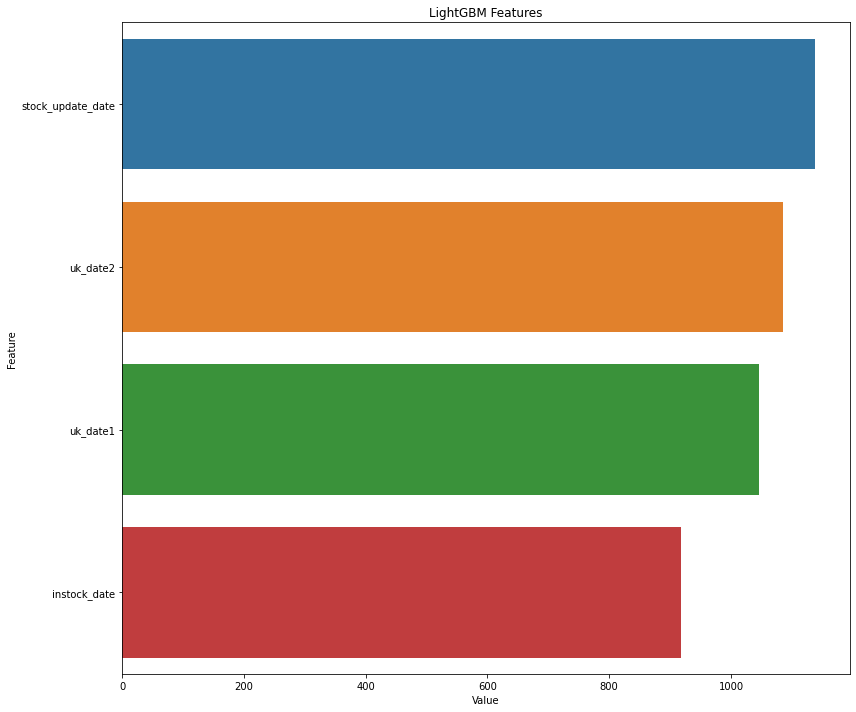

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.90)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", 100-sqrt(mean_absolute_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  91.79544289682313
RMSLE LGBM:  91.4974948600354
RMSLE LGBM:  91.13952285330768
RMSLE LGBM:  91.4366589085626
RMSLE LGBM:  91.24039655582435
RMSLE LGBM:  91.71980270203714
RMSLE LGBM:  91.51640837565975
RMSLE LGBM:  91.53156649168936
RMSLE LGBM:  91.53812357481821
RMSLE LGBM:  91.34090998823153


In [0]:
np.mean(errlgb,0)

8.524367279301083

In [0]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([63.81644949, 91.36502703, 89.39606026, ..., 52.53326031,
       53.09867781, 52.64728861])

In [0]:
submission = pd.DataFrame({
        #"gift_id": test['gift_id'],
        "price": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

           price
0      63.816449
1      91.365027
2      89.396060
3      73.640994
4      81.546726
...          ...
13514  56.590162
13515  52.399119
13516  52.533260
13517  53.098678
13518  52.647289

[13519 rows x 1 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=500, random_state=101, subsample=0.8, loss='ls')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('score', 100-sqrt(mean_absolute_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       69785.0541        7658.6735           10.26s
         2       61775.0086        5976.2482            9.90s
         3       56899.4751        5605.9437            9.72s
         4       46020.9075        4307.3603            9.56s
         5       50612.5653        3374.0197            9.34s
         6       45776.3841        2432.8739            9.16s
         7       48755.2853        2212.7090            9.17s
         8       45279.3740        2121.5308            9.06s
         9       37618.4507        1470.8912            9.13s
        10       37974.7516        1375.6807            9.05s
        20       32311.6489         219.9622            8.76s
        30       28669.0804         115.5567            8.56s
        40       31670.1593         -33.0479            8.42s
        50       25862.6635          35.6926            8.16s
        60       25761.7471          10.0244            7.94s
       

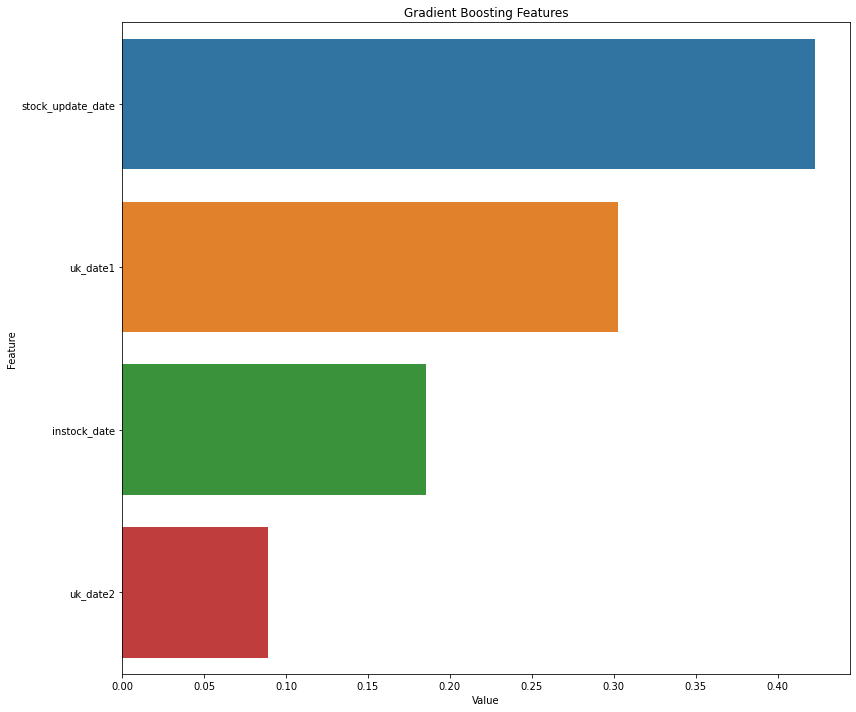

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest=test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    #gb = GradientBoostingRegressor(learning_rate=0.9, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
    gb = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=1000, subsample=0.8, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=31, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print('Score', 100-sqrt(mean_absolute_error(y_test, y_pred)))

    errgb.append(sqrt(mean_absolute_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

Score 91.46094784484008
Score 91.23651113822663
Score 91.44511267463712
Score 91.44751653791411


In [0]:
np.mean(errgb,0)

8.6132178771034

In [0]:
cat_final = np.mean(y_pred_totgb,0)
cat_final

array([ 69.7265425 , 130.45370984, 145.95578133, ...,  38.91563828,
        44.88082988,  39.79195244])

In [0]:
submission = pd.DataFrame({
        "gift_id": test['gift_id'],
        "price": cat_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

            price
0       69.726543
1      130.453710
2      145.955781
3       59.727205
4      121.333139
...           ...
13514   40.785753
13515   39.005989
13516   38.915638
13517   44.880830
13518   39.791952

[13519 rows x 1 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

# scalling

In [0]:

scaler = MinMaxScaler()
scaler.fit(train.drop(['price', 'gift_id'], axis = 1))
train_n = scaler.transform(train.drop(['price', 'gift_id'], axis = 1))

In [0]:
scaler = MinMaxScaler()
scaler.fit(test.drop(['gift_id'], axis = 1))
test_n = scaler.transform(test.drop(['gift_id'], axis = 1))

In [0]:
train_n = np.array(train_n)
train_norm = pd.DataFrame(train_n, columns=train.columns.drop(['price', 'gift_id']))

In [0]:
test_n = np.array(test_n)
test_norm = pd.DataFrame(test_n, columns=test.columns.drop(['gift_id']))

In [0]:
train_norm.head(5)

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,stock_update_date_year,stock_update_date_day,stock_update_date_weekofyear,stock_update_date_month,stock_update_date_dayofweek,stock_update_date_weekend,stock_update_date_hour,stock_update_date_minute,uk_date1_year,uk_date1_day,uk_date1_weekofyear,uk_date1_month,uk_date1_dayofweek,uk_date1_weekend,uk_date1_hour,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute
0,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.217391,0.118644,0.0,0.266667,0.956522,1.0,0.333333,0.0,0.652174,0.830508,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.347826,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.304348,0.118644
1,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,1.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.260870,0.118644,0.0,0.333333,0.956522,1.0,0.666667,0.0,0.565217,0.830508,0.000000,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.260870,0.118644
2,0.428992,0.292601,0.000000,0.530113,0.207654,0.337407,0.929859,0.9,0.764165,1.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.391304,0.508475,0.0,0.766667,0.239130,0.2,0.500000,0.0,0.608696,0.779661,0.666667,0.833333,0.057692,0.000000,0.166667,0.0,0.000000,0.067797,0.666667,0.566667,0.192308,0.181818,0.666667,0.0,0.086957,0.000000
3,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.217391,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.695652,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.565217,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.173913,0.000000
4,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,0.9,0.268281,1.0,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.565217,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.652174,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.043478,0.000000


In [0]:
test_norm.head(5)

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,stock_update_date_year,stock_update_date_day,stock_update_date_weekofyear,stock_update_date_month,stock_update_date_dayofweek,stock_update_date_weekend,stock_update_date_hour,stock_update_date_minute,uk_date1_year,uk_date1_day,uk_date1_weekofyear,uk_date1_month,uk_date1_dayofweek,uk_date1_weekend,uk_date1_hour,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute
0,0.619573,0.770930,0.003174,0.019659,0.177158,0.458733,0.929509,1.000000,0.919942,0.0,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.565217,0.830508,0.0,0.500000,0.977778,1.0,0.333333,0.0,0.434783,0.830508,0.0,0.500000,0.978261,1.0,0.333333,0.0,0.521739,0.830508,0.5,0.400000,0.846154,0.909091,1.000000,1.0,0.173913,0.0
1,0.299485,0.620930,0.099722,0.479238,0.788845,0.271529,0.929509,1.000000,0.720524,0.0,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.565217,0.830508,0.0,0.533333,0.977778,1.0,0.500000,0.0,0.608696,0.830508,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.608696,0.830508,0.5,0.066667,0.826923,0.909091,0.500000,0.0,0.043478,0.0
2,0.464312,0.503488,0.795133,0.181043,0.667596,0.360599,0.929509,1.000000,0.926735,1.0,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.565217,0.830508,0.0,0.500000,0.977778,1.0,0.333333,0.0,0.565217,0.830508,0.0,0.466667,0.978261,1.0,0.166667,0.0,0.478261,0.830508,0.5,0.000000,0.826923,0.909091,0.166667,0.0,0.217391,0.0
3,0.729948,0.503488,0.840894,0.200100,0.914077,0.583008,0.929509,1.000000,0.839884,0.0,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.565217,0.830508,0.0,0.500000,0.977778,1.0,0.333333,0.0,0.478261,0.830508,0.0,0.433333,0.978261,1.0,0.000000,0.0,0.521739,0.830508,0.5,0.100000,0.826923,0.909091,0.666667,0.0,0.173913,0.0
4,0.031641,0.620930,0.809814,0.150953,0.914077,0.063666,0.929509,0.888889,0.071325,1.0,0.0,0.366667,0.956522,1.0,0.833333,1.0,0.565217,0.830508,0.0,0.566667,0.977778,1.0,0.666667,0.0,0.478261,0.830508,0.0,0.433333,0.978261,1.0,0.000000,0.0,0.434783,0.830508,0.5,0.033333,0.826923,0.909091,0.333333,0.0,0.043478,0.0


In [0]:
train_norm_merge = train_norm
train_norm_merge['price'] = train['price']
#train_norm1_merge['gift_id']

In [0]:

train_norm_merge.head(5)

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,stock_update_date_year,stock_update_date_day,stock_update_date_weekofyear,stock_update_date_month,stock_update_date_dayofweek,stock_update_date_weekend,stock_update_date_hour,stock_update_date_minute,uk_date1_year,uk_date1_day,uk_date1_weekofyear,uk_date1_month,uk_date1_dayofweek,uk_date1_weekend,uk_date1_hour,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute,price
0,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.217391,0.118644,0.0,0.266667,0.956522,1.0,0.333333,0.0,0.652174,0.830508,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.347826,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.304348,0.118644,175.54
1,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,1.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.260870,0.118644,0.0,0.333333,0.956522,1.0,0.666667,0.0,0.565217,0.830508,0.000000,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.000000,0.766667,0.153846,0.090909,0.000000,0.0,0.260870,0.118644,95.80
2,0.428992,0.292601,0.000000,0.530113,0.207654,0.337407,0.929859,0.9,0.764165,1.0,0.0,0.666667,0.134615,0.090909,0.666667,0.0,0.391304,0.508475,0.0,0.766667,0.239130,0.2,0.500000,0.0,0.608696,0.779661,0.666667,0.833333,0.057692,0.000000,0.166667,0.0,0.000000,0.067797,0.666667,0.566667,0.192308,0.181818,0.666667,0.0,0.086957,0.000000,107.35
3,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,1.0,0.268281,0.0,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.217391,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.695652,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.565217,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.173913,0.000000,172.90
4,0.044150,0.597534,0.520946,0.338411,0.686612,0.053092,0.929859,0.9,0.268281,1.0,0.0,0.700000,0.134615,0.090909,0.833333,1.0,0.304348,0.118644,0.0,0.300000,0.956522,1.0,0.500000,0.0,0.565217,0.830508,0.666667,0.200000,0.846154,0.909091,0.000000,0.0,0.652174,0.830508,0.666667,0.166667,0.826923,0.909091,1.000000,1.0,0.043478,0.000000,77.72


In [0]:
train_df = train_norm_merge
test_df = test_norm

# Ngboost

In [0]:
!pip install ngboost

     |████████████████████████████████| 337kB 5.6MB/s 


In [0]:
from ngboost import NGBRegressor
ngb = NGBRegressor(verbose=1, learning_rate=0.9, n_estimators=100, random_state=101)
ngb.fit(X_train, y_train)
y_pred = ngb.predict(X_cv)
print('score', sqrt(mean_absolute_error(y_cv, y_pred)))

[iter 0] loss=6.9871 val_loss=0.0000 scale=0.0625 norm=4.4907
score 8.419411213527708


In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    ngb = NGBRegressor(learning_rate=0.9, n_estimators=200, random_state=101)
    ngb.fit(X_train, y_train)
    y_pred = ngb.predict(X_test)
    print('Score', mean_absolute_error(y_test, y_pred))

    errgb.append(mean_absolute_error(y_test, y_pred))
    p = ngb.predict(Xtest)
    y_pred_totgb.append(p)

[iter 0] loss=7.0406 val_loss=0.0000 scale=0.0625 norm=4.6627
[iter 100] loss=5.6070 val_loss=0.0000 scale=1.0000 norm=46.5607
Score 58.64584591996658
[iter 0] loss=6.5178 val_loss=0.0000 scale=0.1250 norm=6.8362
[iter 100] loss=5.4529 val_loss=0.0000 scale=1.0000 norm=40.0362
Score 311.3248097985482
[iter 0] loss=7.0443 val_loss=0.0000 scale=0.0625 norm=4.6370
[iter 100] loss=5.5686 val_loss=0.0000 scale=2.0000 norm=91.0556
Score 46.858762217540004
[iter 0] loss=7.0159 val_loss=0.0000 scale=0.0625 norm=4.4282
[iter 100] loss=5.5273 val_loss=0.0000 scale=1.0000 norm=44.2007
Score 112.2091552162728
[iter 0] loss=7.0460 val_loss=0.0000 scale=0.0625 norm=4.5972
[iter 100] loss=5.5519 val_loss=0.0000 scale=1.0000 norm=45.3489
Score 54.498275171753804
[iter 0] loss=7.0078 val_loss=0.0000 scale=0.0625 norm=4.5720
[iter 100] loss=5.5411 val_loss=0.0000 scale=1.0000 norm=44.5355
Score 90.09777965224804
[iter 0] loss=7.0438 val_loss=0.0000 scale=0.0625 norm=4.5539
[iter 100] loss=5.5290 val_los

In [0]:
np.mean(errgb,0)

69.22650606943901

In [0]:
ng = np.mean(y_pred_totgb,0)

In [0]:
ng

array([57.27516501, 75.9018728 , 87.88816649, ..., 10.3014851 ,
       15.97109931,  0.99208482])

In [0]:
submission = pd.DataFrame({
        "gift_id": test['gift_id'],
        "price": ng
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

         gift_id      price
0      57.275165  57.275165
1      75.901873  75.901873
2      87.888166  87.888166
3      65.514241  65.514241
4      95.879057  95.879057
...          ...        ...
13514   0.771358   0.771358
13515   7.297979   7.297979
13516  10.301485  10.301485
13517  15.971099  15.971099
13518   0.992085   0.992085

[13519 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
test.to_csv('test_gift.csv')

# pycaret

In [0]:
train.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes', 'price'],
      dtype='object')

In [0]:
c=['gift_id', 'gift_type', 'gift_category', 'gift_cluster',
       'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'is_discounted', 'volumes']
for i in c:
  del train[i]
  del test[i]

In [0]:
!pip3 install pycaret --upgrade

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 389kB 7.2MB/s 
     |████████████████████████████████| 3.0MB 14.0MB/s 
     |████████████████████████████████| 1.2MB 29.9MB/s 
     |████████████████████████████████| 7.0MB 11.3MB/s 
     |████████████████████████████████| 266kB 39.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 1.6MB 38.8MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 133kB 42.8MB/s 
     |████████████████████████████████| 63.9MB 50kB/s 
     |████████████████████████████████| 2.1MB 35.7MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 6.2MB 41.7MB/s 
     |████████████████████████████████| 235kB 44.1MB/s 
     |████████████████████████████████| 552kB 42.7MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
    

In [0]:
from pycaret.regression import * 
regression_setup = setup(data= train, target='price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1821
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(20279, 5)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models(blacklist = None, fold = 10,  round = 4, turbo = True)

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:56:08
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,TheilSen Regressor
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.052877e+02,4.586038e+04,2.101145e+02,4.081000e-01,1.1195,1.947300e+00
1,Ridge Regression,1.060428e+02,4.592974e+04,2.103069e+02,4.069000e-01,1.1242,1.974400e+00
2,Linear Regression,1.061657e+02,4.594284e+04,2.103463e+02,4.066000e-01,1.1284,1.977700e+00
3,Random Sample Consensus,1.022468e+02,4.642465e+04,2.112551e+02,4.021000e-01,1.0979,1.878200e+00
4,Lasso Regression,1.023273e+02,4.711994e+04,2.129975e+02,3.917000e-01,1.0520,1.869000e+00
5,Orthogonal Matching Pursuit,1.077400e+02,4.884186e+04,2.170812e+02,3.676000e-01,1.0905,2.001300e+00
6,Passive Aggressive Regressor,9.511010e+01,5.524519e+04,2.312550e+02,2.832000e-01,1.0031,1.287500e+00
7,Elastic Net,1.123867e+02,6.117807e+04,2.442034e+02,1.978000e-01,1.0512,2.147900e+00
8,Lasso Least Angle Regression,1.200120e+02,6.992617e+04,2.616582e+02,7.610000e-02,1.1027,2.269900e+00
9,Least Angle Regression,1.623768e+30,1.830600e+62,4.278551e+30,-2.580588e+57,12.9385,3.280307e+28


KeyboardInterrupt: ignored

In [0]:
par=create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,91.5588,36080.1100,189.9477,0.3423,1.1456,1.2066
1,102.9732,78137.0744,279.5301,0.1887,1.0736,1.0744
2,96.5165,40497.9608,201.2411,0.3622,1.1373,1.4797
3,100.1319,97987.2889,313.0292,0.1840,0.8956,1.2637
4,85.9264,36383.2114,190.7438,0.2914,0.9312,1.6509
5,91.1259,36146.7572,190.1230,0.3684,0.9662,1.3215
6,93.2832,47065.2067,216.9452,0.3365,0.9143,1.2757
7,102.3796,67231.2501,259.2899,0.2452,0.9860,1.3059
8,96.0472,70102.7605,264.7693,0.2087,0.9546,1.2572
9,91.1582,42820.2702,206.9306,0.3041,1.0268,1.0391


In [0]:
tuned_par = tune_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,90.9643,36017.9787,189.7840,0.3435,1.1175,1.2028
1,102.9639,78190.7826,279.6261,0.1881,1.0784,1.0638
2,96.7080,40496.8192,201.2382,0.3622,1.1335,1.5459
3,99.5578,98239.3464,313.4316,0.1819,0.8890,1.2332
4,85.0063,36440.6919,190.8945,0.2903,0.9256,1.6009
5,90.8068,36207.5690,190.2829,0.3673,0.9599,1.3165
6,92.9109,47140.8742,217.1195,0.3355,0.9115,1.2601
7,102.2483,67450.9106,259.7131,0.2427,0.9841,1.2864
8,95.6076,69837.8612,264.2685,0.2117,0.9459,1.2710
9,90.7082,42715.2283,206.6766,0.3058,1.0146,1.0335


In [0]:
ensem_par=ensemble_model(par)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84.7469,32750.0652,180.9698,0.4030,0.9100,1.3884
1,96.7428,74449.1417,272.8537,0.2270,0.8901,1.2648
2,92.1460,40112.5103,200.2811,0.3683,0.9743,1.5874
3,97.6294,99003.4712,314.6482,0.1756,0.8810,1.1110
4,82.2385,36821.2542,191.8887,0.2829,0.9100,1.4898
5,89.5024,35840.1450,189.3149,0.3737,0.9360,1.3493
6,89.2363,48096.5721,219.3093,0.3220,0.8856,1.0169
7,100.5926,66908.0266,258.6659,0.2488,0.9101,1.3581
8,95.0474,67582.3925,259.9661,0.2371,0.9121,1.4638
9,88.6522,39706.0662,199.2638,0.3547,0.9060,1.2534


In [0]:
#blend all models
blend_all = blend_models()
#create models for blending
br = create_model('br')
rr = create_model('rr')
lr = create_model('lr')
#blend trained models
blend_specific = blend_models(estimator_list = [br,rr,lr])

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:27:32
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [0]:
save_model(llar, 'llar1')

Transformation Pipeline and Model Succesfully Saved


In [0]:
# make predictions
predictions = predict_model(ensem_par, data=test)
# view the predictions
predictions

,instock_date,stock_update_date,uk_date1,uk_date2,Label
0,2016-11-12 13:49:12,2016-11-16 10:49:12,2016-11-16 12:49:12,2016-11-13 04:00:00.000,73.6870
1,2016-11-12 13:49:22,2016-11-17 14:49:22,2016-11-12 14:49:22,2016-11-03 01:00:00.000,89.1679
2,2016-11-12 13:49:23,2016-11-16 13:49:23,2016-11-15 11:49:23,2016-11-01 05:00:00.000,77.5213
3,2016-11-12 13:49:24,2016-11-16 11:49:24,2016-11-14 12:49:24,2016-11-04 04:00:00.000,74.5033
4,2016-11-12 13:49:40,2016-11-18 11:49:40,2016-11-14 10:49:40,2016-11-02 01:00:00.000,62.3805
...,...,...,...,...,...
13514,2017-04-07 20:51:34,2017-04-10 19:51:34,2017-04-04 21:51:34,2017-03-30 07:00:59.623,62.6098
13515,2017-04-07 22:51:34,2017-04-08 22:51:34,2017-04-04 20:51:34,2017-04-02 09:00:59.623,80.4438
13516,2017-04-07 22:51:34,2017-04-08 22:51:34,2017-04-08 19:51:34,2017-03-31 06:00:59.623,123.4690
13517,2017-04-15 18:55:17,2017-04-19 00:44:29,2017-04-19 01:44:29,2017-04-15 18:03:15.352,120.6960


In [0]:
predictions['Label'].nunique()

13393

In [0]:
predictions.to_csv('a.csv')

In [0]:
from google.colab import files
files.download('a.csv')